Initial Setup:

In [23]:
import pandas as pd
import nltk

Read Data:

In [24]:
data_path1 = "../Data/raw/spam.csv"
df_1 = pd.read_csv(data_path1, encoding = "latin-1")

df_1.info()
df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Data Cleaning Step 1.1:**

Change label encoding to:

0 - ham

1 - spam

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_1['label'] = encoder.fit_transform(df_1['label'])
df_1.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Data Cleaning Step 1.2:

Null values analysis

In [26]:
# missing values
df_1.isnull().sum()

label    0
text     0
dtype: int64

**Data Cleaning Step 1.3: **

Check for duplicates and remove them

In [27]:
# check for duplicate values and delete them
print("delete ", df_1.duplicated().sum(), "duplicates...")
df_1 = df_1.drop_duplicates(keep='first')
print("Remaining duplicates: ",df_1.duplicated().sum())

delete  415 duplicates...
Remaining duplicates:  0


**Data Cleaning Step 2.1: **

In [28]:
data_path2 = "../Data/raw/enron_spam_data.csv"
df_2 = pd.read_csv(data_path2, encoding = "latin-1")

df_2.info()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


In [29]:
#Drop rows with null elements
df_2.dropna(inplace=True)
df_2.info()
df_2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33107 entries, 1 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33107 non-null  int64 
 1   Subject     33107 non-null  object
 2   Message     33107 non-null  object
 3   Spam/Ham    33107 non-null  object
 4   Date        33107 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


(33107, 5)

In [30]:
df_2.head()

,Message ID,Subject,Message,Spam/Ham,Date
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,1999-12-14


In [31]:
 # drop last 2 cols
df_2.drop(columns=['Message ID','Date'],inplace=True)
df_2.sample(5)

,Subject,Message,Spam/Ham
19407,re : another said : i bet,"over 1 , 600 , ooo males in the world used our...",spam
16412,reply me after reading my mail from mrs margar...,"barr : margaret milakovich\nmartin chambers ,\...",spam
23010,consolidated london doorstep findings,attached is the spreadsheet requested that con...,ham
25240,are you listed in major search engines ?,submitting your website in search engines may ...,spam
10156,the thing is that a great errrection is provid...,excellent everyday low prices on brand name an...,spam


In [32]:
# renaming the cols
df_2.rename(columns={'Subject':'sub','Message':'msg','Spam/Ham':'label'},inplace=True)
df_2.sample(5)

,sub,msg,label
249,fw : whose needs ? ? ? ? ? ? ? ?,> perfect ! ! ! ! ! ! ! ! !\n>\n> * * propriet...,ham
1319,"hpl nom for august 2 , 2000",( see attached file : hplo 802 . xls )\n- hplo...,ham
12094,fw : originations schedule,"faith ,\nper our discussion , enovate and cent...",ham
8180,fyi : forward,"hi vince ,\nthe following is what i wrote to m...",ham
29518,your r _ x order is ready for refill from 96 but,"bandstand tenant castanet creon\nasetar , ""\nw...",spam


In [33]:
df_2['label'] = encoder.fit_transform(df_2['label'])
df_2.sample(5)

,sub,msg,label
710,organizational changes,- - - - - - - - - - - - - - - - - - - - - - fo...,0
12103,prc contingency,"louise ,\nas of today , i intend to be at mond...",0
25252,are you ready to get it ?,hello !\nviagra is the # 1 med to struggle wit...,1
30080,pls call me : 0027 - 73 - 6373 - 227,philip wonyane\n23 b gateway avenue\ngauteng j...,1
3984,hard even after you cuumm,do not leave\nthem hanging tonight ! ! ! ! ! !...,1


In [34]:
#search dubs
print("found ", df_2.duplicated().sum(), "dubs")
df_2 = df_2.drop_duplicates(keep='first')
print("dubs remain: ",df_2.duplicated().sum())

found  3071 dubs
dubs remain:  0


In [35]:
#merge sub + msg

df_2['text'] = df_2['sub'] + " " +  df_2['msg']
df_2.drop(columns=['msg','sub'],inplace=True)
df_2.sample(5)

,label,text
9344,0,re : willow and pathstar evaluations ok - than...
16784,0,damn the weather ! ! ! ! hey there ! !\noh i w...
7197,0,bollerslev seminar vince :\ni don ' t know if ...
1716,0,"cornhusker contract information rick ,\nattach..."
9216,0,re : from a previous summer intern dear giusep...


Merging the two datasets:

In [36]:
df = pd.concat([df_1, df_2])
df.shape

(35193, 2)

In [37]:
df.sample(5)

,label,text
23087,0,emily ' s first pictures just so you can see w...
18614,1,fw : your email address . save on prescription...
4213,1,Missed call alert. These numbers called but le...
9870,1,international calls for only 33 cents per minu...
16247,1,re : award claim final notfication . el - gord...


In [38]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [39]:
df.to_csv("Data/merged_cleaned.csv", index=False)

# Data preprocessing:

The following function applies the following preprocessing steps to a text:

*   lowecase
*   tokenization (using nltk word tokenizer)
*   removing special characters and punctuation (actually all characters except numbers and letters)
*   removing stopwords (using nltk stopword list)
*   normalizing words using lematization (using nltk WordNetLemmatizer)

In [40]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

#from nltk.stem.porter import PorterStemmer
#ps = PorterStemmer()

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    #retaining only numbers and alphabets
    y = []
    for i in text:
        if i.isalpha():
            y.append(i)

    #clone copy of list y
    text = y[:]
    y.clear()

    #stopwords removal
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    #leammtization
    for i in text:
        #y.append(ps.stem(i))
        y.append(lemmatizer.lemmatize(i))

    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elsandner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/elsandner/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,label,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [42]:
df.drop(columns=['text'],inplace=True)
df.head()

,label,transformed_text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts may...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


In [43]:
df.rename(columns={'transformed_text':'text'},inplace=True)
df.head()

,label,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts may...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


In [44]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [45]:
df.to_csv("Data/merged_cleaned_preprocessed.csv", index=False)

#Feature Engineering

<AxesSubplot:xlabel='label', ylabel='count'>

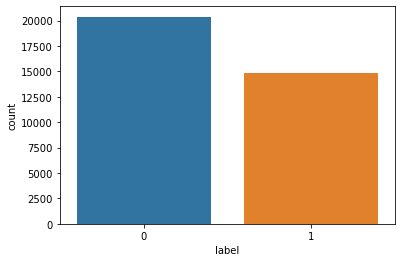

In [47]:
import seaborn as sns
sns.countplot(x=df["label"])

0..ham 1..spam